In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [97]:
df = pd.read_csv('insurance_part2_data.csv')
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


## Q 2.1

In [98]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


#### We see the duration has negative value (min=-1) which is not possible. This shows that few samples from the data needs treatment.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


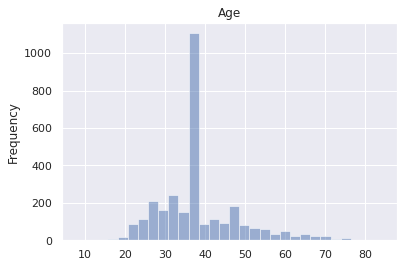

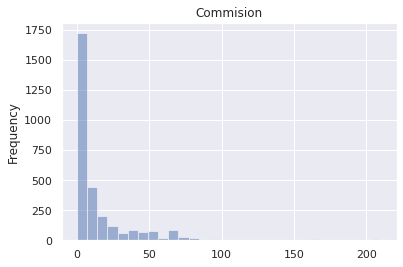

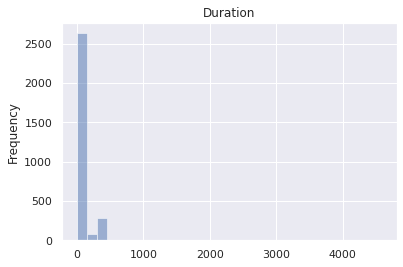

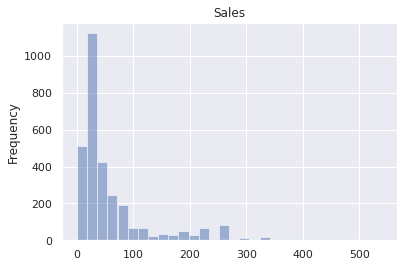

In [100]:
for c in df.columns:
    try:
        df[c].plot.hist(bins=30, alpha=0.5)
        plt.title(c)
        plt.show()
    except:
        pass

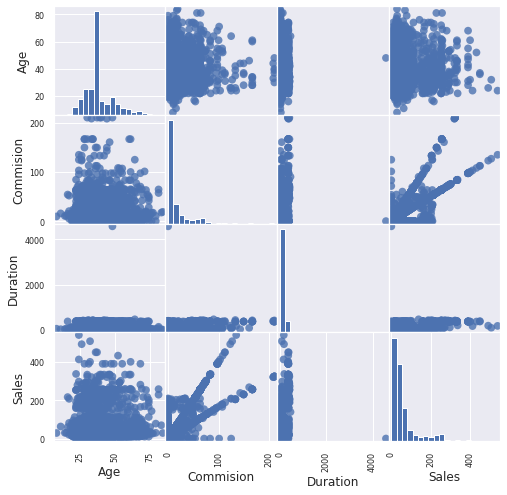

In [101]:
# Pair plot for all numerical values

sm = pd.plotting.scatter_matrix(df, figsize=(8,8), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

## Correlation Matrix

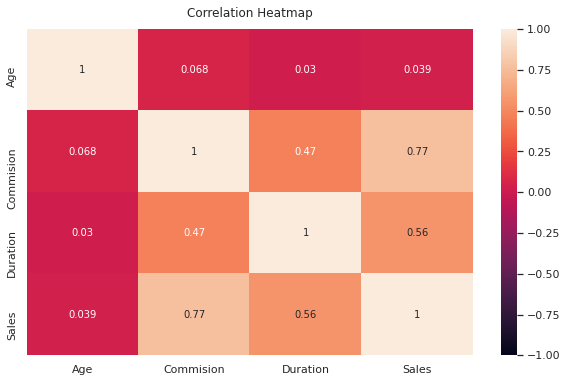

In [102]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### We see high correlation values between sales, commission and duration

### We do find many outliers in the variables (the black scatter points represents outliers before scaling)

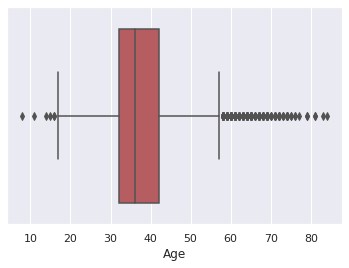

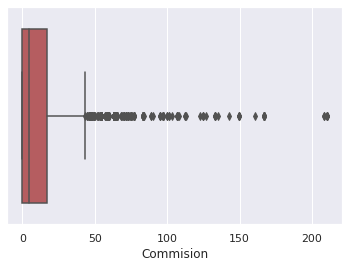

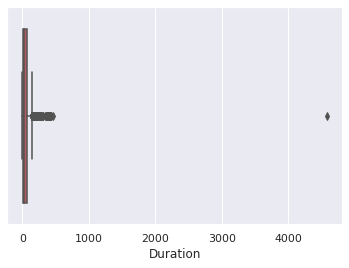

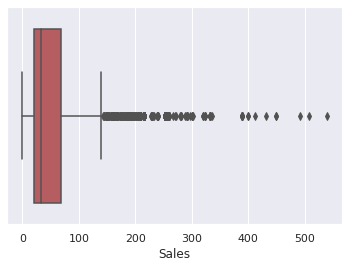

In [103]:
for col in df.columns:
    try:
        if col=='Destination':
            continue
        sns.boxplot(df[col],orient='horizondal',color='r')
        plt.show()
    except:
        pass

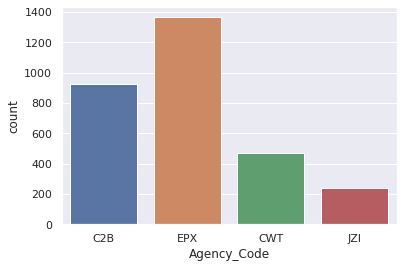

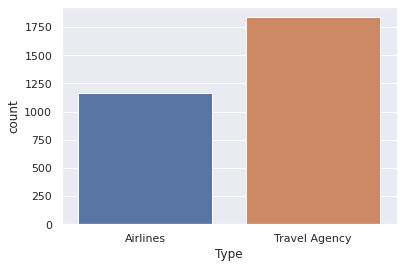

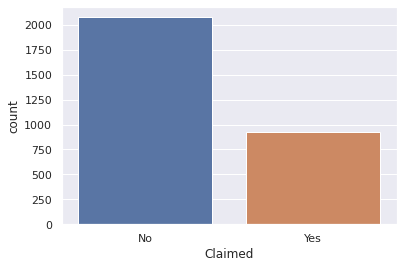

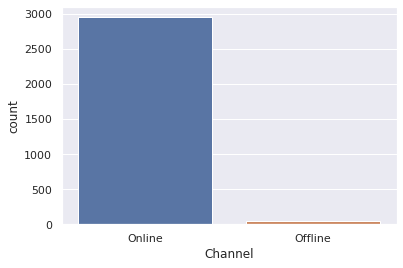

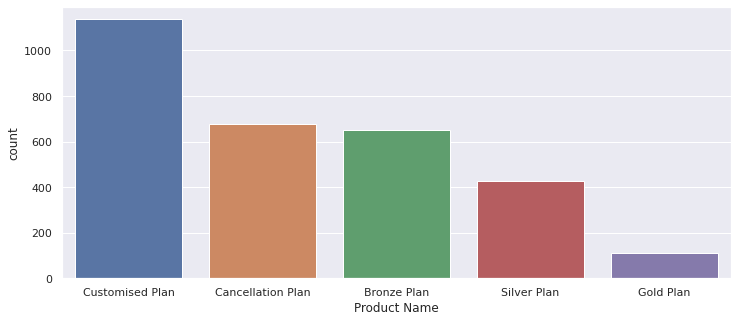

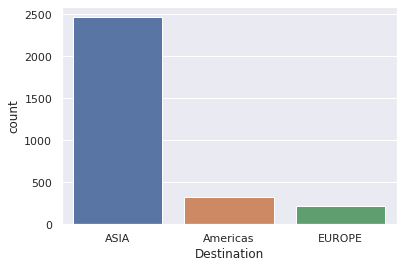

In [104]:
for col in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    try:
        if col=='Product Name':
            fig, ax = plt.subplots(figsize=(12,5))
            sns.countplot(data = df, x = col, ax=ax)
            plt.show()
        else:
            sns.countplot(data = df, x = col)
            plt.show()    
    except:
        pass

## Converting all df objects to categorical values

In [105]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

## Q 2.2

In [106]:
y = df["Claimed"]
X = df.drop("Claimed", axis=1)

In [107]:
from scipy.stats import zscore
X_scaled = X.apply(zscore)

In [108]:
## Splitting data into training (70%) and test set (30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [109]:
### DEFINING CART-RF-ANN MODEL

CART = DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,min_samples_split=260, random_state=1)
RF = RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,min_samples_split=46, n_estimators=350, random_state=1)
ANN = MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [110]:
CART = CART.fit(X_train, y_train)
RF = RF.fit(X_train, y_train)
ANN = ANN.fit(X_train, y_train)

In [111]:
ytrain_predict_CART = CART.predict(X_train)
ytest_predict_CART = CART.predict(X_test)

ytrain_predict_RF = RF.predict(X_train)
ytest_predict_RF = RF.predict(X_test)

ytrain_predict_ANN = ANN.predict(X_train)
ytest_predict_ANN = ANN.predict(X_test)

## Q 2.3

### 1. Accuracy, Confusion Matrix, Plot ROC curve, ROC_AUC score and classification reports for **CART** on Train and Test dataset.

AUC Train dataset: 0.823


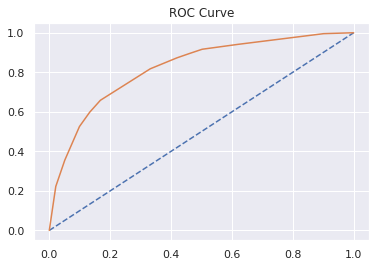

In [112]:
probs_cart = CART.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
cart_train_auc = roc_auc_score(y_train, probs_cart)
print('AUC Train dataset: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title('ROC Curve')
plt.show()

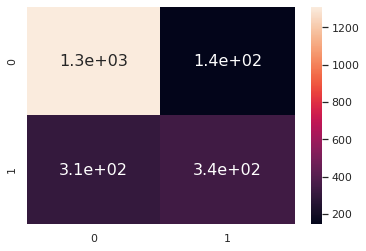

Train Accuracy: 0.7852380952380953


In [113]:
### Confusion matrix

cm = confusion_matrix(y_train, ytrain_predict_CART)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show() 

#Train Data Accuracy
cart_train_acc = CART.score(X_train,y_train) 
print('Train Accuracy:', cart_train_acc)

In [114]:
print(classification_report(y_train, ytrain_predict_CART))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



AUC Test dataset: 0.801


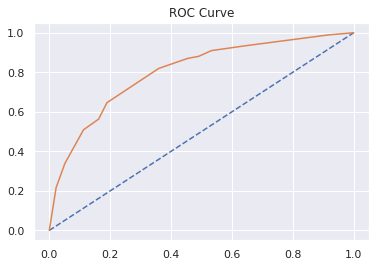

In [115]:
probs_cart = CART.predict_proba(X_test)
probs_cart = probs_cart[:, 1]
cart_test_auc = roc_auc_score(y_test, probs_cart)
print('AUC Test dataset: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(y_test, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)
plt.title('ROC Curve')
plt.show()

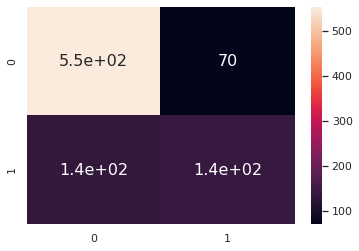

Test Accuracy: 0.7711111111111111


In [116]:
### Confusion matrix

cm = confusion_matrix(y_test, ytest_predict_CART)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show() 

cart_test_acc = CART.score(X_test,y_test) 
print('Test Accuracy:', cart_test_acc)

In [117]:
print(classification_report(y_test, ytest_predict_CART))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



### 2. Accuracy, Confusion Matrix, Plot ROC curve, ROC_AUC score and classification reports for **RF** on Train and Test dataset.

AUC Train dataset: 0.856


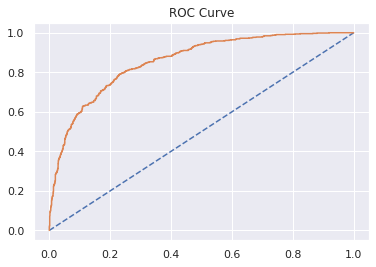

In [118]:
probs_rf = RF.predict_proba(X_train)
probs_rf = probs_rf[:, 1]
rf_train_auc = roc_auc_score(y_train, probs_rf)
print('AUC Train dataset: %.3f' % rf_train_auc)
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr)
plt.title('ROC Curve')
plt.show()

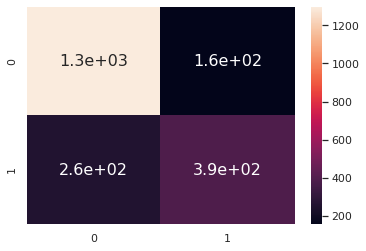

Train Accuracy: 0.8042857142857143


In [119]:
### Confusion matrix

cm = confusion_matrix(y_train, ytrain_predict_RF)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show() 

rf_train_acc = RF.score(X_train,y_train) 
print('Train Accuracy:', rf_train_acc)

In [120]:
print(classification_report(y_train, ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



AUC Test dataset: 0.818


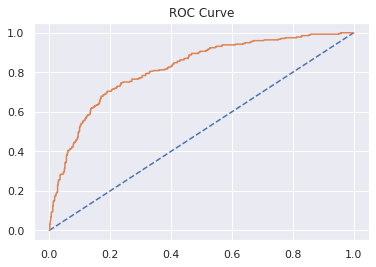

In [121]:
probs_rf = RF.predict_proba(X_test)
probs_rf = probs_rf[:, 1]
rf_test_auc = roc_auc_score(y_test, probs_rf)
print('AUC Test dataset: %.3f' % rf_test_auc)
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr, rf_test_tpr)
plt.title('ROC Curve')
plt.show()

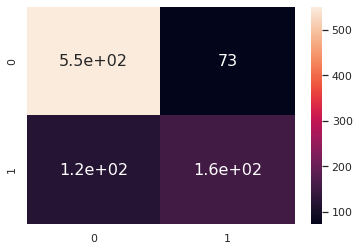

Test Accuracy: 0.7844444444444445


In [122]:
### Confusion matrix

cm = confusion_matrix(y_test, ytest_predict_RF)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show() 

rf_test_acc = RF.score(X_test,y_test) 
print('Test Accuracy:', rf_test_acc)

In [123]:
print(classification_report(y_test, ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.78      0.78       900



### 3. Accuracy, Confusion Matrix, Plot ROC curve, ROC_AUC score and classification reports for **ANN** on Train and Test dataset.

AUC Train dataset: 0.817


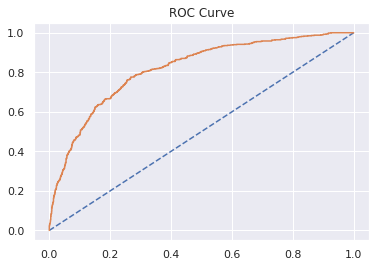

In [124]:
probs_ann = ANN.predict_proba(X_train)
probs_ann = probs_ann[:, 1]
ann_train_auc = roc_auc_score(y_train, probs_ann)
print('AUC Train dataset: %.3f' % ann_train_auc)
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(y_train, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ann_train_fpr, ann_train_tpr)
plt.title('ROC Curve')
plt.show()

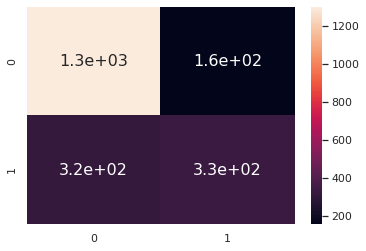

Train Accuracy: 0.7761904761904762


In [125]:
### Confusion matrix

cm = confusion_matrix(y_train, ytrain_predict_ANN)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show() 

ann_train_acc = ANN.score(X_train,y_train) 
print('Train Accuracy:', ann_train_acc)

In [126]:
print(classification_report(y_train, ytrain_predict_ANN))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



AUC Test dataset: 0.804


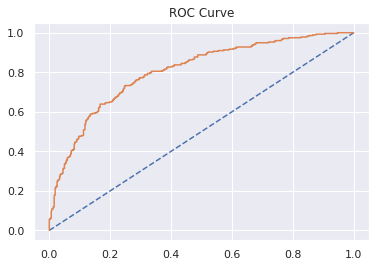

In [127]:
probs_ann = ANN.predict_proba(X_test)
probs_ann = probs_ann[:, 1]
ann_test_auc = roc_auc_score(y_test, probs_ann)
print('AUC Test dataset: %.3f' % ann_test_auc)
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(y_test, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ann_test_fpr, ann_test_tpr)
plt.title('ROC Curve')
plt.show()

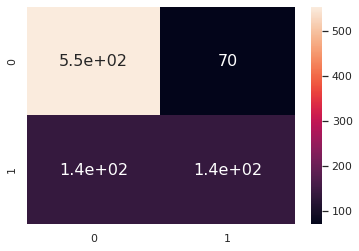

Test Accuracy: 0.7688888888888888


In [128]:
### Confusion matrix

cm = confusion_matrix(y_test, ytest_predict_ANN)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show() 

ann_test_acc = ANN.score(X_test,y_test) 
print('Test Accuracy:', ann_test_acc)

In [129]:
print(classification_report(y_test, ytest_predict_ANN))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



# Q 2.4

In [130]:
index=['Accuracy', 'AUC']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc],
        'CART Test':[cart_test_acc,cart_test_auc],
       'Random Forest Train':[rf_train_acc,rf_train_auc],
        'Random Forest Test':[rf_test_acc,rf_test_auc],
       'Neural Network Train':[ann_train_acc,ann_train_auc],
        'Neural Network Test':[ann_test_acc,ann_test_auc]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.80,0.78,0.78,0.77
AUC,0.82,0.80,0.86,0.82,0.82,0.80


Therefore the best optimized model is **RF model**, as it has better accuracy and AUC than other two **CART** & **ANN**.

## Q 2.5

Collect more real time data and past data if possible.

By looking at the insurance data and when we find correlation of different variables such as day of the incident, time, age group, etc, we can conclude that more data is required

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. 

• As per the data $90\%$ of insurance is done by online channel and almost all the offline business has a claimed associated

• Also based on the model we are getting $80\%$ accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern 